In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/user_behavior_dataset_cleaned.csv")
df.head()

,User_ID,Device_Model,Operating_System,App_Usage_Time,Screen_On_Time,Battery_Drain,Number_of_Apps_Installed,Data_Usage,Age,Gender,User_Behavior_Class,App_Usage_Time_outlier,Screen_On_Time_outlier,Battery_Drain_outlier,Data_Usage_outlier
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,False,False,False,False
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,False,False,False,False
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,False,False,False,False
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,False,False,False,False
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,False,False,False,False


In [ ]:
df = df.drop(columns=['User_ID', 'Screen_On_Time_outlier', 'App_Usage_Time_outlier',
                      'Battery_Drain_outlier', 'Data_Usage_outlier'])
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['Screen_On_Time'].sort_values(ascending=False)
print("Correlation with Screen_On_Time:\n", target_corr)

Correlation with Screen_On_Time:
 Screen_On_Time              1.000000
User_Behavior_Class         0.964581
App_Usage_Time              0.950333
Battery_Drain               0.948983
Number_of_Apps_Installed    0.946975
Data_Usage                  0.941322
Age                         0.017232
Name: Screen_On_Time, dtype: float64


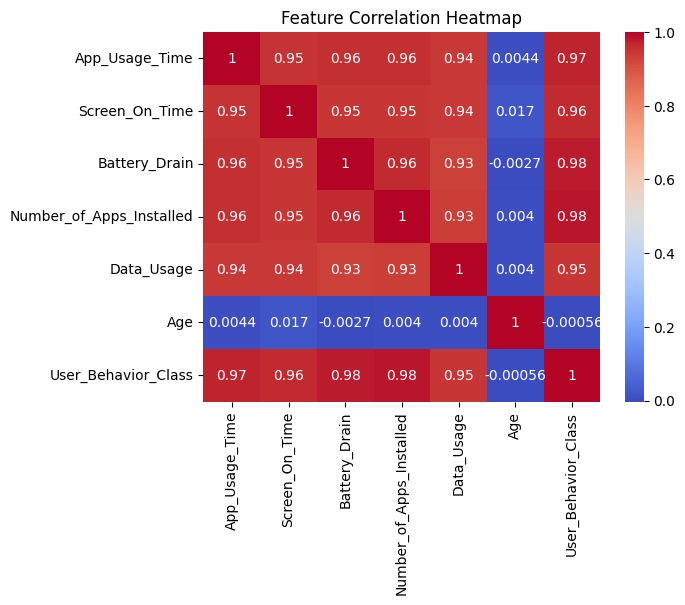

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
weak_features = target_corr[abs(target_corr) < 0.1].index.tolist()
print("Weakly correlated features:", weak_features)

Weakly correlated features: ['Age']
